In [1]:
import pygimli as pg
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import os
from os import system
import numpy as np

In [2]:
def callTriangle(filename,
                 quality=33, 
                 triangle='triangle',
                 verbose=True):
    
    filebody = filename.replace('.poly', '')

    syscal = triangle + ' -pq' + str(quality)
    syscal += 'Aa ' + filebody + '.poly'
 
    if verbose:
        print(syscal)

    system(syscal)

In [3]:
world = mt.createWorld(start=[-200e3, -200e3], 
                       end=[340e3, 300e3], 
                       layers=[0, 1e3, 100e3, 200e3], 
                       area=[0, 0, 0, 4e4, 0],
                       marker=[1, 2, 3, 4, 5],
                       worldMarker=False)

In [4]:
blockhorizontal = mt.createRectangle(start=[20e3, 20e3],
                           end=[120e3, 30e3],
                           marker=6,  
                           markerPosition=[70e3, 25e3], 
                           area=1e6, boundaryMarker=10)

In [5]:
blockleft = mt.createRectangle(start=[30e3, 6e3],
                           end=[40e3, 20e3],
                           marker=7,  
                           markerPosition=[35e3, 7e3], 
                           area=1e5, boundaryMarker=10)

blocklefttop = mt.createRectangle(start=[30e3, 1e3],
                           end=[40e3, 6e3],
                           marker=8,  
                           markerPosition=[35e3, 2e3], 
                           area=1e5, boundaryMarker=10)

blockright = mt.createRectangle(start=[100e3, 6e3],
                           end=[110e3, 20e3],
                           marker=9,  
                           markerPosition=[105e3, 7e3], 
                           area=1e5, boundaryMarker=10)

blockrighttop = mt.createRectangle(start=[100e3, 1e3],
                           end=[110e3, 6e3],
                           marker=10,  
                           markerPosition=[105e3, 2e3], 
                           area=1e5, boundaryMarker=10)

blockmiddle = mt.createRectangle(start=[40e3, 1e3],
                           end=[100e3, 20e3],
                           marker=11,  
                           markerPosition=[70e3, 2e3], 
                           area=1e6, boundaryMarker=10)

In [6]:
geom = world + blockhorizontal + blockleft + blocklefttop  + blockright + blockrighttop + blockmiddle

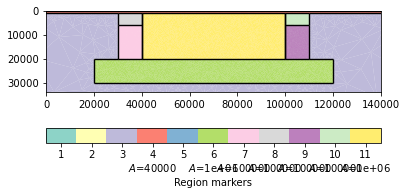

In [7]:
ax, _ = pg.show(geom, 
                showNodes=False, 
                boundaryMarker=False)
ax.set_xlim((0, 140e3))
ax.set_ylim((0, 34e3))
ax.set_ylim(ax.get_ylim()[::-1]);

In [8]:
mt.exportPLC(geom,
             '../meshes/permeability.poly', 
             float_format='.8e')

In [9]:
callTriangle('../meshes/permeability.poly', 
             quality=34.2,
             verbose=False)

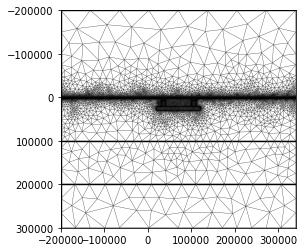

In [10]:
mesh = mt.createMesh(geom, quality=34.2)
ax, _ = pg.show(mesh)
ax.set_ylim(ax.get_ylim()[::-1]);